In [1]:
import pandas as pd
from re import sub

In [3]:
df = pd.read_csv("Restaurant_Reviews.tsv",sep = "\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
Q = []
for i in df.Review:
    i = sub("[^a-zA-Z0-9 ]","",i)
    Q.append(i.upper())
    

In [6]:
Q

['WOW LOVED THIS PLACE',
 'CRUST IS NOT GOOD',
 'NOT TASTY AND THE TEXTURE WAS JUST NASTY',
 'STOPPED BY DURING THE LATE MAY BANK HOLIDAY OFF RICK STEVE RECOMMENDATION AND LOVED IT',
 'THE SELECTION ON THE MENU WAS GREAT AND SO WERE THE PRICES',
 'NOW I AM GETTING ANGRY AND I WANT MY DAMN PHO',
 'HONESLTY IT DIDNT TASTE THAT FRESH',
 'THE POTATOES WERE LIKE RUBBER AND YOU COULD TELL THEY HAD BEEN MADE UP AHEAD OF TIME BEING KEPT UNDER A WARMER',
 'THE FRIES WERE GREAT TOO',
 'A GREAT TOUCH',
 'SERVICE WAS VERY PROMPT',
 'WOULD NOT GO BACK',
 'THE CASHIER HAD NO CARE WHAT SO EVER ON WHAT I HAD TO SAY IT STILL ENDED UP BEING WAYYY OVERPRICED',
 'I TRIED THE CAPE COD RAVOLI CHICKEN WITH CRANBERRYMMMM',
 'I WAS DISGUSTED BECAUSE I WAS PRETTY SURE THAT WAS HUMAN HAIR',
 'I WAS SHOCKED BECAUSE NO SIGNS INDICATE CASH ONLY',
 'HIGHLY RECOMMENDED',
 'WAITRESS WAS A LITTLE SLOW IN SERVICE',
 'THIS PLACE IS NOT WORTH YOUR TIME LET ALONE VEGAS',
 'DID NOT LIKE AT ALL',
 'THE BURRITTOS BLAH',
 'THE

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [8]:
xnew = cv.fit_transform(Q).toarray()

In [9]:
xnew

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
 cv.get_feature_names_out()

array(['10', '100', '1199', ..., 'yum', 'yummy', 'zero'], dtype=object)

In [11]:
len(cv.get_feature_names_out())

2067

In [12]:
Y = df.Liked

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

nn = Sequential()
nn.add(Dense(1000,input_dim=(2067)))
nn.add(Dense(800))
nn.add(Dropout(0.2))
nn.add(Dense(500))
nn.add(Dropout(0.2))
nn.add(Dense(300))
nn.add(Dense(1,activation="sigmoid"))
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model_cv = nn.fit(xnew,Y,epochs=30,validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 5s 46ms/step - loss: 0.6783 - accuracy: 0.6963 - val_loss: 0.6512 - val_accuracy: 0.6200
Epoch 2/30
25/25 [==============================] - 0s 16ms/step - loss: 0.2429 - accuracy: 0.9100 - val_loss: 0.7268 - val_accuracy: 0.7050
Epoch 3/30
25/25 [==============================] - 0s 15ms/step - loss: 0.1342 - accuracy: 0.9600 - val_loss: 0.7396 - val_accuracy: 0.7850
Epoch 4/30
25/25 [==============================] - 0s 16ms/step - loss: 0.0554 - accuracy: 0.9762 - val_loss: 0.9113 - val_accuracy: 0.8050
Epoch 5/30
25/25 [==============================] - 0s 13ms/step - loss: 0.0169 - accuracy: 0.9962 - val_loss: 1.1176 - val_accuracy: 0.8300
Epoch 6/30
25/25 [==============================] - 0s 13ms/step - loss: 7.2526e-04 - accuracy: 1.0000 - val_loss: 2.3685 - val_accuracy: 0.7800
Epoch 7/30
25/25 [==============================] - 0s 15ms/step - loss: 2.3637e-05 - accuracy: 1.0000 - val_loss: 2.5628 - val_accuracy: 0.7800
Epoch

In [14]:
tr_acc_cv = model_cv.history['accuracy']
ts_acc_cv = model_cv.history['val_accuracy']

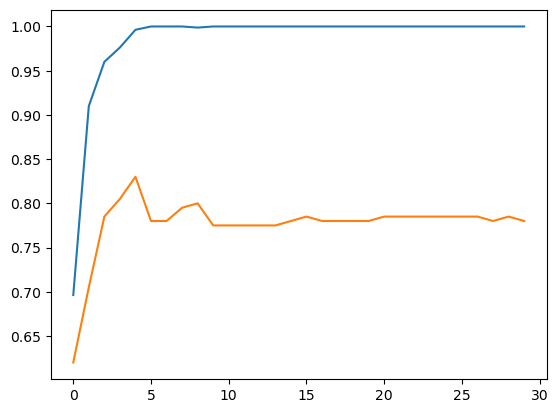

In [15]:
import matplotlib.pyplot as plt
plt.plot(tr_acc_cv)
plt.plot(ts_acc_cv)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()


In [17]:
Xnew = tv.fit_transform(Q).toarray()

In [18]:
len(tv.get_feature_names_out())

2067

In [19]:
nn_t = Sequential()
nn_t.add(Dense(1000,input_dim=(2067)))
nn_t.add(Dense(800))
nn_t.add(Dropout(0.2))
nn_t.add(Dense(500))
nn_t.add(Dropout(0.2))
nn_t.add(Dense(100))
nn_t.add(Dense(1,activation="sigmoid"))
nn_t.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn_t.fit(Xnew,Y,epochs=30,validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 2s 31ms/step - loss: 0.5605 - accuracy: 0.6812 - val_loss: 0.4353 - val_accuracy: 0.7850
Epoch 2/30
25/25 [==============================] - 0s 16ms/step - loss: 0.1389 - accuracy: 0.9475 - val_loss: 0.5247 - val_accuracy: 0.7900
Epoch 3/30
25/25 [==============================] - 0s 13ms/step - loss: 0.0283 - accuracy: 0.9925 - val_loss: 1.0593 - val_accuracy: 0.7400
Epoch 4/30
25/25 [==============================] - 0s 13ms/step - loss: 0.0097 - accuracy: 0.9962 - val_loss: 1.4104 - val_accuracy: 0.7700
Epoch 5/30
25/25 [==============================] - 0s 13ms/step - loss: 0.0201 - accuracy: 0.9962 - val_loss: 0.7610 - val_accuracy: 0.8400
Epoch 6/30
25/25 [==============================] - 0s 14ms/step - loss: 0.0058 - accuracy: 0.9975 - val_loss: 2.3032 - val_accuracy: 0.7500
Epoch 7/30
25/25 [==============================] - 0s 16ms/step - loss: 2.8457e-05 - accuracy: 1.0000 - val_loss: 2.2128 - val_accuracy: 0.7600
Epoch 8/3

In [20]:
tr_acc = model.history['accuracy']
ts_acc = model.history['val_accuracy']

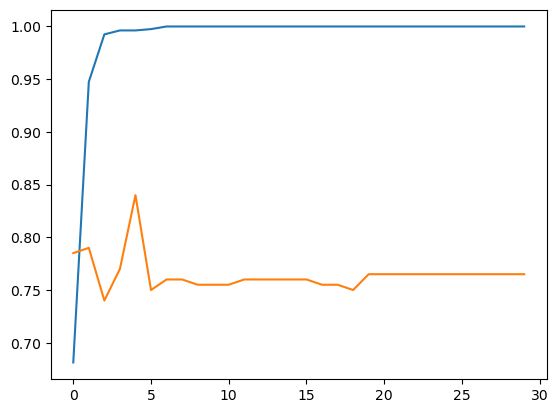

In [21]:
plt.plot(tr_acc)
plt.plot(ts_acc)

In [22]:
df_ts = pd.read_csv("rest_reviews_testing.csv",sep = "\t")

In [23]:
df_ts.tail()

,Review
12,Delayed service
13,Horrible taste
14,Late Service
15,taste is ok but delivery is too late..Can't sp...
16,disappointing food experience


In [24]:
Q_ts = []
for i in df_ts.Review:
    i = sub("[^a-zA-Z0-9 ]","",i)
    Q_ts.append(i.upper())

In [25]:
X_tes = tv.transform(Q_ts).toarray()

In [26]:
len(tv.get_feature_names_out())

2067

In [27]:
ts_pred = nn_t.predict(X_tes)

1/1 [==============================] - 0s 130ms/step


In [28]:
y_pred = (ts_pred >= 0.5).astype(int)

In [29]:
y_pred

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [30]:
df_ts

,Review
0,Tasty and delicious
1,crust is hard
2,yummy....I like Dominos pizza
3,fast service and good taste
4,Good taste
5,Its very delicious... hope it will maintain ta...
6,Food was okay but the cheesy dip provided was ...
7,taste is ok but not satisfied
8,Poor service
9,Good hygiene food delivered by dominos with pr...
